# Fuel Consumption Prediction using Linear Regression


In [11]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [12]:
# Step 2: Import Dataset and Clean Column Names
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('FuelConsumption.csv')
# Clean column names (e.g., replace spaces with underscores)
df.columns = [col.strip().replace(' ', '_') for col in df.columns]

print("Cleaned Column Names:")
print(df.columns)

Saving FuelConsumption.csv to FuelConsumption (1).csv
Cleaned Column Names:
Index(['Year', 'MAKE', 'MODEL', 'VEHICLE_CLASS', 'ENGINE_SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL_CONSUMPTION', 'COEMISSIONS'],
      dtype='object')


In [13]:
# Step 3: Exploratory Data Analysis
print("First 5 rows of the dataset:")
print(df.head())
print("\n-----------------------------------\n")

print("Dataset Information:")
df.info()
print("\n-----------------------------------\n")

print("Statistical Summary:")
print(df.describe())
print("\n-----------------------------------\n")

print("Missing Values Check:")
print(df.isnull().sum())

First 5 rows of the dataset:
   Year   MAKE    MODEL VEHICLE_CLASS  ENGINE_SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL_CONSUMPTION  COEMISSIONS  
0    X              10.5          216  
1    X               9.8          205  
2    Z              13.7          265  
3    Z              15.0          301  
4    X              11.4          230  

-----------------------------------

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0  

In [25]:
# Step 4: Feature Engineering
# Let's drop non-predictive or categorical columns
# Note the correct column names are used here
df_features = df.drop(['Year', 'MAKE', 'MODEL', 'VEHICLE_CLASS', 'TRANSMISSION', 'FUEL', 'COEMISSIONS'], axis=1)

# The target variable is 'CO2EMISSIONS'
y = df['COEMISSIONS']
X = df_features

print("--- Features (X) ---")
print(X.head())
print("\n--- Target (y) ---")
print(y.head())

--- Features (X) ---
   ENGINE_SIZE  CYLINDERS  FUEL_CONSUMPTION
0          1.6          4              10.5
1          1.6          4               9.8
2          3.2          6              13.7
3          3.5          6              15.0
4          1.8          4              11.4

--- Target (y) ---
0    216
1    205
2    265
3    301
4    230
Name: COEMISSIONS, dtype: int64


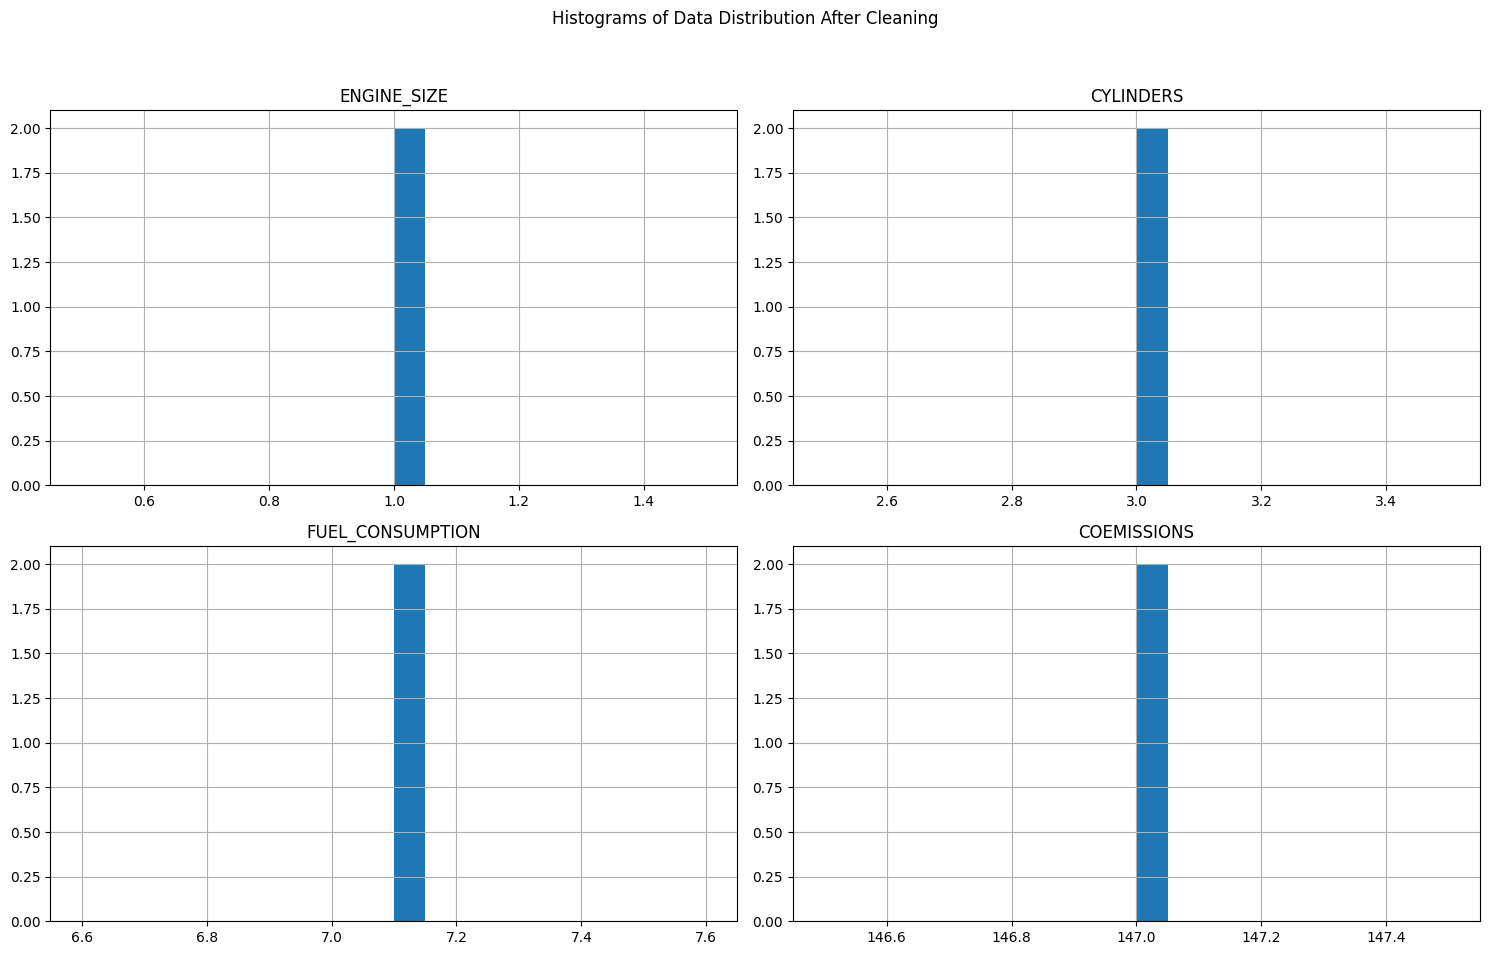

In [26]:
# Step 5: Use histograms to show the distribution of the data
df_cleaned.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Data Distribution After Cleaning')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [27]:
# Step 6: Split data into separate training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Step 7: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Step 8: Model training with Linear Regression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_scaled, y_train)

# You can inspect the model's coefficients
print("Model Coefficients:", lin_reg_model.coef_)
print("Model Intercept:", lin_reg_model.intercept_)

Model Coefficients: [ 5.23717848 -4.79322119 61.23969165]
Model Intercept: 293.2133072407046


In [30]:
# Step 9: Predict results and check performance metrics
y_pred = lin_reg_model.predict(X_test_scaled)

print('R-squared:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-squared: 0.9846361749926678
Mean Absolute Error (MAE): 6.691424698649745
Mean Squared Error (MSE): 80.4372523750809
Root Mean Squared Error (RMSE): 8.968681752358085


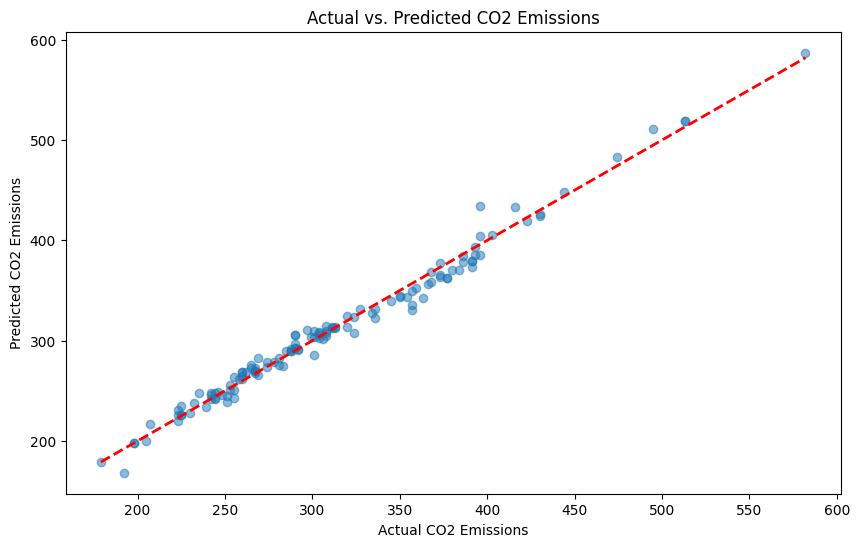

In [31]:
# Step 10: Visualization of Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs. Predicted CO2 Emissions')
plt.show()